<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [ ]:
# unzip the file using python zipfile module
import zipfile
with zipfile.ZipFile('concrete_data_week4.zip', 'r') as zip_ref:
    zip_ref.extractall()

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [24]:
# import libraries
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# setup global variables
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

In [14]:
# setup data generators
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input)

# setup training data
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

# setup validation data
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

# setup test data
test_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical',
    shuffle=False)


Found 30001 images belonging to 2 classes.
Found 9501 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [4]:
# setup VGG16 model
model = Sequential()
model.add(VGG16(weights='imagenet', pooling='average'))
# add output layer
model.add(Dense(num_classes, activation='softmax'))

In [5]:
model.layers[0].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1000)              138357544 
_________________________________________________________________
dense (Dense)                (None, 2)                 2002      
Total params: 138,359,546
Trainable params: 2,002
Non-trainable params: 138,357,544
_________________________________________________________________


In [13]:
model.layers[0].summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
# compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# define steps_per_epoch and validation_steps
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

In [9]:
# train the model with fit_generator
train_history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=validation_steps)

Epoch 1/5
301/301 [==============================] - 73s 243ms/step - loss: 0.6814 - accuracy: 0.8580 - val_loss: 0.6697 - val_accuracy: 0.9432
Epoch 2/5
301/301 [==============================] - 83s 275ms/step - loss: 0.6589 - accuracy: 0.9426 - val_loss: 0.6474 - val_accuracy: 0.9435
Epoch 3/5
301/301 [==============================] - 84s 278ms/step - loss: 0.6373 - accuracy: 0.9475 - val_loss: 0.6260 - val_accuracy: 0.9455
Epoch 4/5
301/301 [==============================] - 82s 273ms/step - loss: 0.6167 - accuracy: 0.9456 - val_loss: 0.6058 - val_accuracy: 0.9473
Epoch 5/5
301/301 [==============================] - 83s 275ms/step - loss: 0.5971 - accuracy: 0.9455 - val_loss: 0.5863 - val_accuracy: 0.9470


In [10]:
# save the model
model.save('concrete_model_vgg.h5')

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [11]:
# load pre-trained resnet50 model
concrete_res = tf.keras.models.load_model('concrete_model_resnet.h5')
# load pre-trained vgg16 model
concrete_vgg = tf.keras.models.load_model('concrete_model_vgg.h5')

In [81]:
# evaluate the model using evaluate_generator
result_res = concrete_res.evaluate(test_generator)
result_vgg = concrete_vgg.evaluate(test_generator)

# print the results
print('Resnet: loss: {}, accuracy: {}'.format(result_res[0], result_res[1]))
print('VGG: loss: {}, accuracy: {}'.format(result_vgg[0], result_vgg[1]))

5/5 [==============================] - 2s 340ms/step - loss: 0.5836 - accuracy: 0.9500
Resnet: loss: 0.008108729496598244, accuracy: 0.9980000257492065
VGG: loss: 0.5836212038993835, accuracy: 0.949999988079071


<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [93]:
# setup prediction generator
prediction_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=5,
    class_mode='categorical',
    seed=2)

Found 500 images belonging to 2 classes.


In [95]:
# predict the first five images
predictions = concrete_res.predict(prediction_generator)
predictions_vgg = concrete_vgg.predict(prediction_generator)

In [94]:
first_batch = prediction_generator.next()
first_batch_images = first_batch[0]
first_batch_labels = first_batch[1]
print(first_batch_labels)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


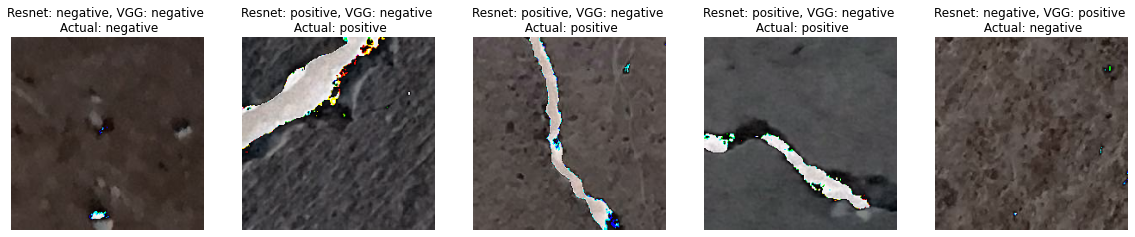

In [103]:
import matplotlib.pyplot as plt
# plot the first five images from batch 1 with their predictions and actual labels
y = ['negative', 'positive']
fig, ax = plt.subplots(1, 5, figsize=(20, 8))
for i in range(5):
    ax[i].imshow(first_batch_images[i].astype('uint8'))
    ax[i].set_title('Resnet: {}, VGG: {} \n Actual: {}'.format(
        y[np.argmax(predictions[i])],
        y[np.argmax(predictions_vgg[i])],
        y[np.argmax(first_batch_labels[i])]))
    ax[i].axis('off')

In [86]:
# report the prediction and their probabilities for the first five images
for i in range(5):
    print('Resnet: {}, Resnet probability: {}'.format(
        y[np.argmax(predictions[i])],
        predictions[i][np.argmax(predictions[i])]))
    print('VGG: {}, VGG probability: {}'.format(
        y[np.argmax(predictions_vgg[i])],
        predictions_vgg[i][np.argmax(predictions_vgg[i])]))
    print('Actual: {}'.format(y[np.argmax(first_batch_labels[i])]))
    print('\n')

Resnet: negative, Resnet probability: 0.9752970337867737
VGG: positive, VGG probability: 0.5564863085746765
Actual: positive


Resnet: positive, Resnet probability: 0.998740017414093
VGG: negative, VGG probability: 0.5468890070915222
Actual: negative


Resnet: positive, Resnet probability: 0.9998015761375427
VGG: negative, VGG probability: 0.5551536679267883
Actual: positive


Resnet: positive, Resnet probability: 0.999748170375824
VGG: negative, VGG probability: 0.5667480826377869
Actual: positive


Resnet: negative, Resnet probability: 0.9962190985679626
VGG: positive, VGG probability: 0.5465282201766968
Actual: positive




### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).